In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# CSV 파일 불러오기

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# 데이터 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# 결측치 확인
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## 데이터 컬럼 설명

*   **age**: 나이
*   **sex**: 성별 (1 = male; 0 = female)
*   **cp**: 가슴 통증 유형 (chest pain type)
*   **trestbps**: 안정 시 혈압 (resting blood pressure)
*   **chol**: 혈중 콜레스테롤 (serum cholestoral in mg/dl)
*   **fbs**: 공복 혈당 > 120 mg/dl (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   **restecg**: 안정 시 심전도 결과 (resting electrocardiographic results)
*   **thalach**: 최대 심박수 (maximum heart rate achieved)
*   **exang**: 운동 유발 협심증 (exercise induced angina) (1 = yes; 0 = no)
*   **oldpeak**: 안정 상태 대비 운동으로 인한 ST 하강 (ST depression induced by exercise relative to rest)
*   **slope**: 최대 운동 ST 분절의 기울기 (the slope of the peak exercise ST segment)
*   **ca**: 형광 투시법으로 확인된 주요 혈관 수 (number of major vessels (0-3) colored by flourosopy)
*   **thal**: 탈라세미아 (thalassemia) (3 = normal; 6 = fixed defect; 7 = reversable defect)
*   **target**: 심장병 유무 (0 = 없음, 1 = 있음) - **예측 대상 변수**

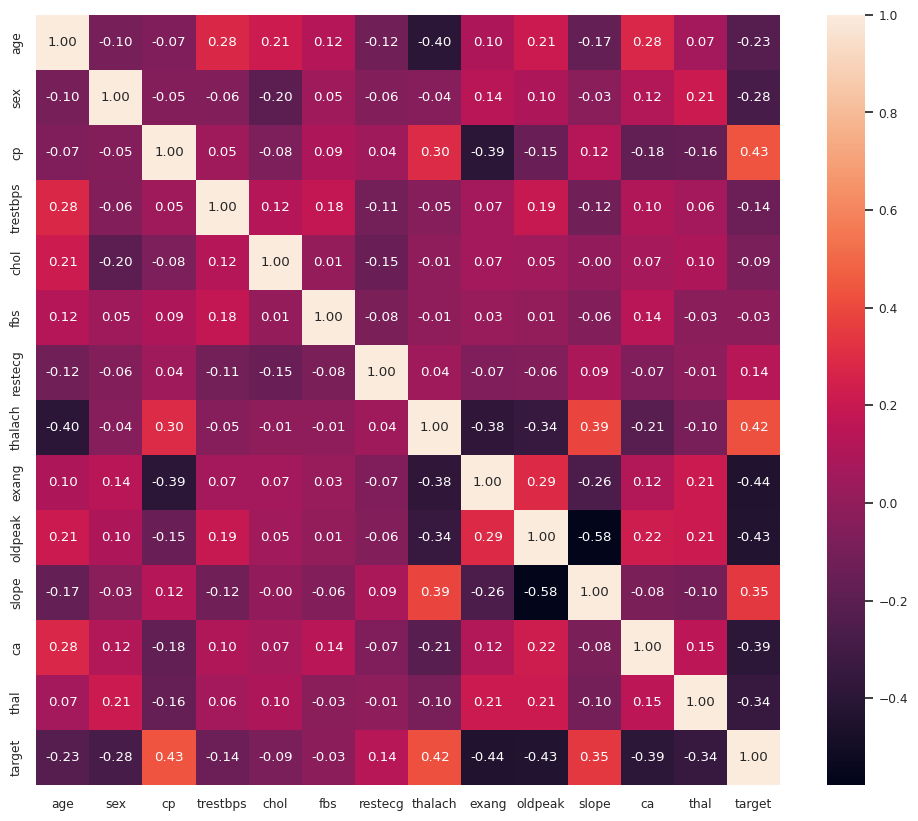

In [7]:
# 상관 관계 행렬 계산
# 0.3 이상인 경우 상관관계가 있고, 0.7 이상이면 아주 높음
df_corr = df.corr()

# 히트맵
plt.figure(figsize=(12, 10)) # Figure size adjusted for more features
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=True, fmt='.2f')
plt.show()

# target와 높은 상관관계를 보이는 feature들을 확인 (예: cp, thalach, slope 등)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
# 특성(X) 데이터: 'target' 컬럼을 제외한 나머지 컬럼들
X = df.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
# 타겟(y) 데이터: 'target' 컬럼
y = df['target']
y.head()

,target
0,1
1,1
2,1
3,1
4,1


# 딥러닝 입력을 위해 Numpy 배열로 변환

In [11]:
# 특성(X) 데이터를 NumPy 배열로 변환
X = X.values

In [12]:
# 타겟(y) 데이터를 NumPy 배열로 변환
y = y.values

In [13]:
# 변환된 X 배열 확인
print(X[:5]) # 첫 5개 행 확인

[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]


In [14]:
# 변환된 y 배열 확인
print(y[:5]) # 첫 5개 값 확인

[1 1 1 1 1]


In [15]:
# 데이터를 훈련 세트(80%)와 테스트 세트(20%)로 분할
# random_state를 설정하여 재현성을 확보하고, stratify=y로 클래스 비율을 유지
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# 분할된 데이터의 형태(shape)를 확인
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (242, 13)
y_train shape: (242,)
X_test shape: (61, 13)
y_test shape: (61,)


In [17]:
# 모델 정의
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# 입력층과 첫 번째 은닉층. input_shape는 특성의 개수(X_train.shape[1])
# 첫 번째 은닉층의 노드 수를 12개로 설정하고 활성화 함수로 'relu' 사용
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
# 두 번째 은닉층. 노드 수를 8개로 설정하고 활성화 함수로 'relu' 사용
model.add(Dense(8, activation='relu'))
# 세 번째 은닉층. 노드 수를 8개로 설정하고 활성화 함수로 'relu' 사용

# 출력층. 이진 분류이므로 노드 수는 1개, 활성화 함수는 'sigmoid' 사용
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일. 옵티마이저로 'adam', 손실 함수로 'binary_crossentropy', 평가 지표로 'accuracy' 설정
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 구조 요약 출력
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# 에포크 수 설정 (예: 50 또는 100)
N_EPOCHS = 50

# 모델 훈련 실행
# batch_size: 한 번의 업데이트에 사용할 샘플 수
# validation_data: 각 에포크 종료 시 모델 성능을 평가할 검증 데이터
history = model.fit(x=X_train, y=y_train,
                    epochs=N_EPOCHS,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1) # verbose=1: 훈련 과정 출력

# 테스트 데이터에 대한 예측 수행 (결과는 확률값)
# y_pred = model.predict(X_test) # 예측은 평가 시 필요하면 수행

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5693 - loss: 3.1919 - val_accuracy: 0.6066 - val_loss: 3.4294
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6023 - loss: 2.7457 - val_accuracy: 0.5738 - val_loss: 3.3006
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5976 - loss: 2.3658 - val_accuracy: 0.5574 - val_loss: 3.2931
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5553 - loss: 2.3719 - val_accuracy: 0.6230 - val_loss: 3.0671
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6170 - loss: 1.9373 - val_accuracy: 0.5902 - val_loss: 3.0086
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6329 - loss: 1.8104 - val_accuracy: 0.5738 - val_loss: 2.9406
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6181 - loss: 1.9432 - val_accuracy: 0.6066 - val_loss: 2.7714
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5783 - loss: 2.0188 - val_accuracy: 0.5902 - val_loss: 2.6915


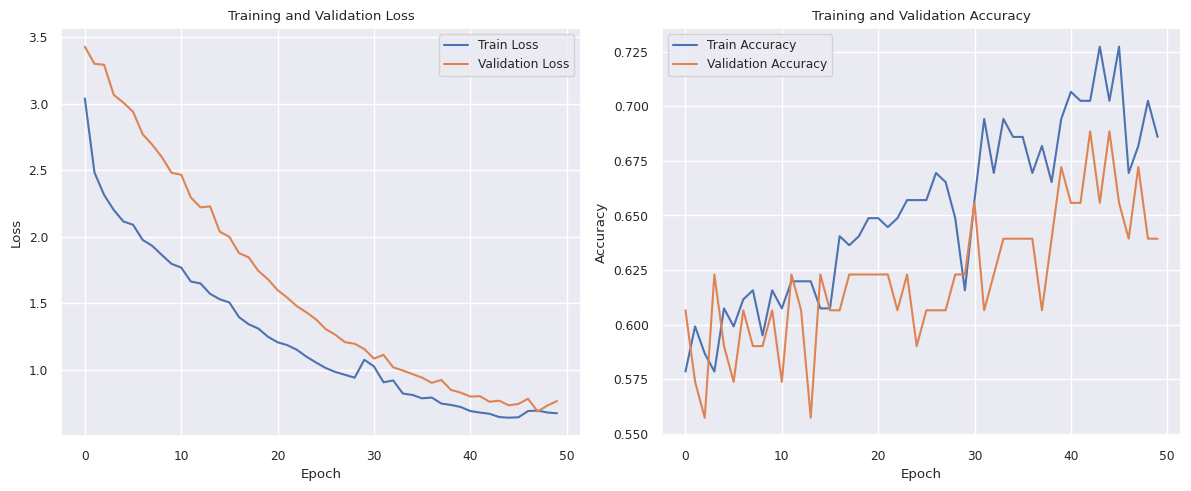

In [19]:
# 손실(loss) 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(N_EPOCHS), history.history['loss'], label='Train Loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 정확도(accuracy) 그래프
plt.subplot(1, 2, 2)
plt.plot(range(N_EPOCHS), history.history['accuracy'], label='Train Accuracy')
plt.plot(range(N_EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Test Loss: 0.7648
Test Accuracy: 0.6393
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

Confusion Matrix:
[[11 17]
 [ 5 28]]


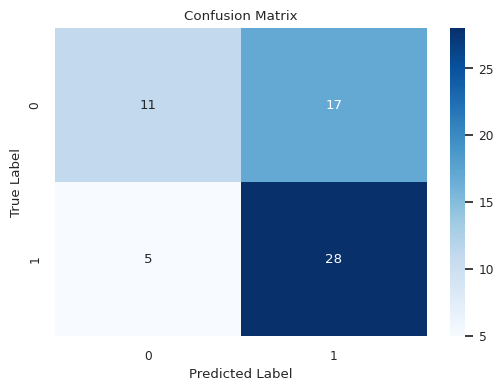


Classification Report:
                precision    recall  f1-score   support

No Disease (0)       0.69      0.39      0.50        28
   Disease (1)       0.62      0.85      0.72        33

      accuracy                           0.64        61
     macro avg       0.65      0.62      0.61        61
  weighted avg       0.65      0.64      0.62        61



In [20]:
# 테스트 데이터로 모델 평가 (손실 및 정확도 출력)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'\nTest Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# 예측 수행 (확률값을 클래스 레이블로 변환)
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32") # 확률이 0.5 이상이면 1, 아니면 0으로 변환

# 혼동 행렬(Confusion Matrix) 출력
print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 분류 리포트(Classification Report) 출력 (정밀도, 재현율, F1-점수 등)
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['No Disease (0)', 'Disease (1)']))